# Generate a Word Cloud

This notebook will take student response text and generate a word cloud from it.

## Import libraries/modules

In [ ]:
import sys
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re


## Import the source file

In [8]:
# Import the data from a source file into a Pandas dataframe

while True:
    try:
        filename = input("File Name: ")
        df = pd.read_excel(f'Source_Files/{filename}')
    except:
        print('An error was encountered when loading the file.')
        retry = input("Try again? (y/n): ")[0].lower()
        if retry == 'y':
            continue
        else:
            print('Exiting the program...')
            sys.exit()
    else:
        print(f'{filename} successfully loaded into a dataframe.')
        break


PHRD622 Virtual Index Card 2025.xlsx successfully loaded into a dataframe.


In [ ]:
# See a sample of the file data
df.head()


,Question ID,Question,Answer
0,3,"In your own words, describe the term pharmacy ...",Using health information to optimize patient c...
1,3,"In your own words, describe the term pharmacy ...",the understanding of pharmacy and it's impact ...
2,3,"In your own words, describe the term pharmacy ...",Pharmacy informatics is a mix of the field of ...
3,3,"In your own words, describe the term pharmacy ...",Pharmacy informatics is using technology or th...
4,3,"In your own words, describe the term pharmacy ...",Pharmacy informatics is a multifaceted sector ...


## Gather the responses

In [ ]:
# Gather all of the responses into a single string variable

## Show the dataframe's column information
print('Dataframe Column Information:\n')
df.info()
print()

## Ask the user which column number has the target data
while True:
    try:
        column = int(input('Which column number has the response data? '))
        responses = ' '.join(df.iloc[:, column])
    except:
        print("That's not a valid integer.")
        retry = input("Try again? (y/n): ")[0].lower()
        if retry == 'y':
            continue
        else:
            print('Exiting the program...')
            sys.exit()
    else:
        print('Response data sample:')
        print(responses[:50])
        break


Dataframe Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Question ID  55 non-null     int64 
 1   Question     55 non-null     object
 2   Answer       55 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.4+ KB

Response data sample:
Using health information to optimize patient care.


## Clean the responses

In [ ]:
# Remove non-breaking spaces
responses = responses.replace('&nbsp', ' ')

# Use regular expression substitution to replace HTML tags
responses = re.sub(r'<.*>', ' ', responses)


## Generate the word cloud

In [20]:
# Generate the word cloud object.
wordcloudobject = WordCloud(width=800, height=400, background_color='white').generate(responses)


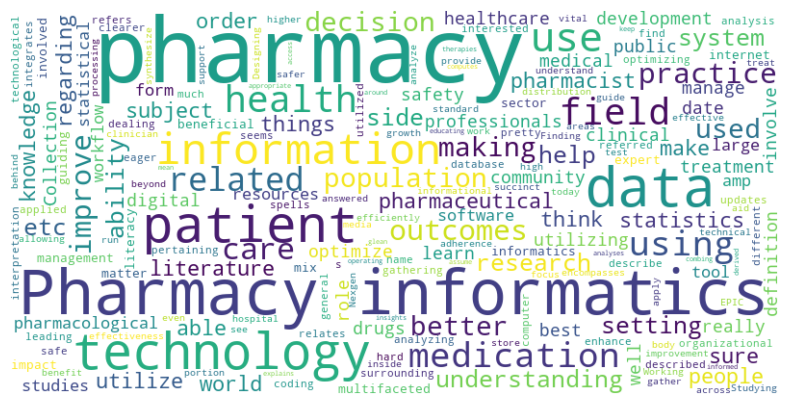

In [21]:
# Display the word cloud using Matplotlib.
plt.figure(figsize=(10,5))
plt.imshow(wordcloudobject, interpolation='bilinear')
plt.axis('off')
plt.show()
